# Feladat 3 (2 pont)
Az éppen tomboló járvány folyamatosan frissülő statisztikai adatai [ezen](https://github.com/CSSEGISandData/COVID-19) a linken találhatóak. Ezen adatok április 3.-ai állásából gyűjtöttük ki a `data.csv` filet.

A `data.csv` fájlban vesszőkkel elválasztva három oszlopot találsz:
 1. dátum
 2. kumulatív COVID-19 esetszám Kínában
 3. kumulatív COVID-19 esetszám Olaszországban
 
- Olvasd be a kumulatív esetszámokat! A dátumot helyettesítsd egész számokkal, ahol az első nap 0, a második nap 1...
- Ábrázold grafikonon a kumulatív esetszámokat a két ország esetére, ügyelj az ábrafeliratokra!
- A kínai adatokra illeszd meg az alábbi függvényt (amennyiben szükséges, kézzel állítsd be a megbecsült kezdőparamétereket):
$$ f(x) = \frac{a}{1 + e^{-(x-b)\cdot c}}$$
- Ábrázold az adatokat és az illesztett függvényt is!
- Mik lettek a függvény paraméterei? Mit jelenthetnek esetünkben ezek a paraméterek? Írd le a saját szavaiddal!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('data.csv') as f: #beolvassuk a filet
    sorok = f.readlines() #minden sorát hozzáadjuk a sorok listához
    
sorok #megnézzük, hogy hogy is néz ki

['date,China,Italy\n',
 '1/22/20,548,0\n',
 '1/23/20,643,0\n',
 '1/24/20,920,0\n',
 '1/25/20,1406,0\n',
 '1/26/20,2075,0\n',
 '1/27/20,2877,0\n',
 '1/28/20,5509,0\n',
 '1/29/20,6087,0\n',
 '1/30/20,8141,0\n',
 '1/31/20,9802,2\n',
 '2/1/20,11891,2\n',
 '2/2/20,16630,2\n',
 '2/3/20,19716,2\n',
 '2/4/20,23707,2\n',
 '2/5/20,27440,2\n',
 '2/6/20,30587,2\n',
 '2/7/20,34110,3\n',
 '2/8/20,36814,3\n',
 '2/9/20,39829,3\n',
 '2/10/20,42354,3\n',
 '2/11/20,44386,3\n',
 '2/12/20,44759,3\n',
 '2/13/20,59895,3\n',
 '2/14/20,66358,3\n',
 '2/15/20,68413,3\n',
 '2/16/20,70513,3\n',
 '2/17/20,72434,3\n',
 '2/18/20,74211,3\n',
 '2/19/20,74619,3\n',
 '2/20/20,75077,3\n',
 '2/21/20,75550,20\n',
 '2/22/20,77001,62\n',
 '2/23/20,77022,155\n',
 '2/24/20,77241,229\n',
 '2/25/20,77754,322\n',
 '2/26/20,78166,453\n',
 '2/27/20,78600,655\n',
 '2/28/20,78928,888\n',
 '2/29/20,79356,1128\n',
 '3/1/20,79932,1694\n',
 '3/2/20,80136,2036\n',
 '3/3/20,80261,2502\n',
 '3/4/20,80386,3089\n',
 '3/5/20,80537,3858\n',
 '3/

In [3]:
day=[] #ebbe az üres tömbbe tesszük majd a napok sorszámát
i = 0  #i első értékét megadjuk, ezt fogjuk majd változtatni

for bleh in sorok[1:]: #végig iterálunk a sorokon, de a 0. indexű sort kihagyjuk mert az nem az adatokat tartalmazza
    day.append(i)      #minden i-t hozzáadunk a nap tömbhöz
    i += 1             #és i értékét egyel növeljük

print(day) #voilá

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]


In [4]:
China = [] #a két ország értékeinek előkészített üres tömb
Italy = []

for sor in sorok[1:]:                      #az első sort kihagyva végig iterálunk az összes soron 
    China.append(float(sor.split(',')[1])) #és az adott sor 1-es indexű elemét a kínai tömbbe...
    Italy.append(float(sor.split(',')[2])) #a 2-es indexű elemét az olasz tömbbe rakjuk
    
print(China) 
print(Italy)

[548.0, 643.0, 920.0, 1406.0, 2075.0, 2877.0, 5509.0, 6087.0, 8141.0, 9802.0, 11891.0, 16630.0, 19716.0, 23707.0, 27440.0, 30587.0, 34110.0, 36814.0, 39829.0, 42354.0, 44386.0, 44759.0, 59895.0, 66358.0, 68413.0, 70513.0, 72434.0, 74211.0, 74619.0, 75077.0, 75550.0, 77001.0, 77022.0, 77241.0, 77754.0, 78166.0, 78600.0, 78928.0, 79356.0, 79932.0, 80136.0, 80261.0, 80386.0, 80537.0, 80690.0, 80770.0, 80823.0, 80860.0, 80887.0, 80921.0, 80932.0, 80945.0, 80977.0, 81003.0, 81033.0, 81058.0, 81102.0, 81156.0, 81250.0, 81305.0, 81435.0, 81498.0, 81591.0, 81661.0, 81782.0, 81897.0, 81999.0, 82122.0, 82198.0, 82279.0, 82361.0, 82432.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 20.0, 62.0, 155.0, 229.0, 322.0, 453.0, 655.0, 888.0, 1128.0, 1694.0, 2036.0, 2502.0, 3089.0, 3858.0, 4636.0, 5883.0, 7375.0, 9172.0, 10149.0, 12462.0, 12462.0, 17660.0, 21157.0, 24747.0, 27980.0, 31506.0, 35713.0

## Fittelés

In [5]:
from scipy.optimize import curve_fit #az illesztéshez szükséges package

In [6]:
def fit(x, a, b, c,): #definiáljuk az illesztendő függvényt
    return a/(1 + np.exp(- (x - b)*c)) 

Text(0, 0.5, 'esetszám')

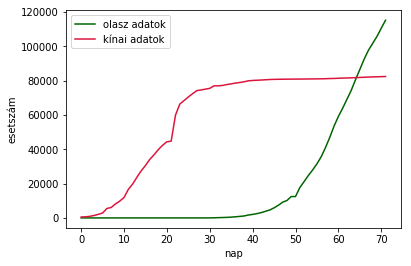

In [7]:
plot(day, Italy, color = 'darkgreen', label = 'olasz adatok') #először a két ország esetszámát 
plot(day, China, color = 'crimson', label = 'kínai adatok')   #plottoljuk a napok függvényében

plt.legend()
xlabel('nap')
ylabel('esetszám')

In [8]:
popt,pcov=curve_fit(fit, day, China, p0 = [7000, 1, 1]) # az illesztés elvégzése
perr = sqrt(diag(pcov))                                 #az illesztési paraméterek hibáinak meghatározása
print (['a','b','c'])
print (popt)                                            #nézzük meg, hogy mit a vissza

['a', 'b', 'c']
[8.12764992e+04 1.78151535e+01 2.19992537e-01]


Text(0, 0.5, 'esetszám')

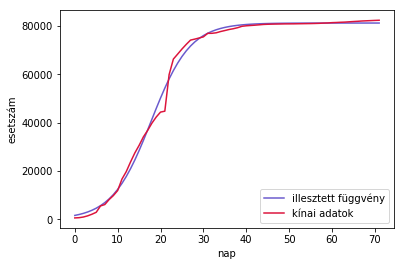

In [9]:
plot(day, fit(day, popt[0], popt[1], popt[2]), label = 'illesztett függvény', color = 'slateblue')
plot(day, China, label = 'kínai adatok', color = 'crimson')

plt.legend()       #ebben a cellában plottoljuk az illesztett függvényt és magát a Kínát
xlabel('nap')
ylabel('esetszám')